<a href="https://colab.research.google.com/github/Manohar-1234/diabetes_prediction-/blob/main/diabetes_prediction_source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
sns.set()
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')


#PIMA diabetes dataset
diabetes_data = pd.read_csv('diabetes.csv') 
#first few rows of dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.shape

(768, 9)

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# statistical measures
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#clean the dataset
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

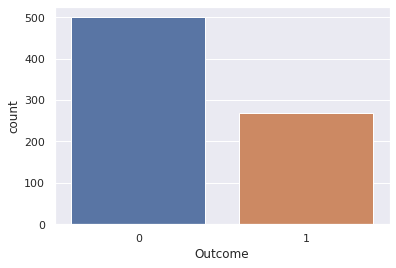

In [9]:
sns.countplot(x='Outcome',data=diabetes_data)
plt.show()

In [10]:
copy_ds=diabetes_data.copy()


In [11]:
copy_ds.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


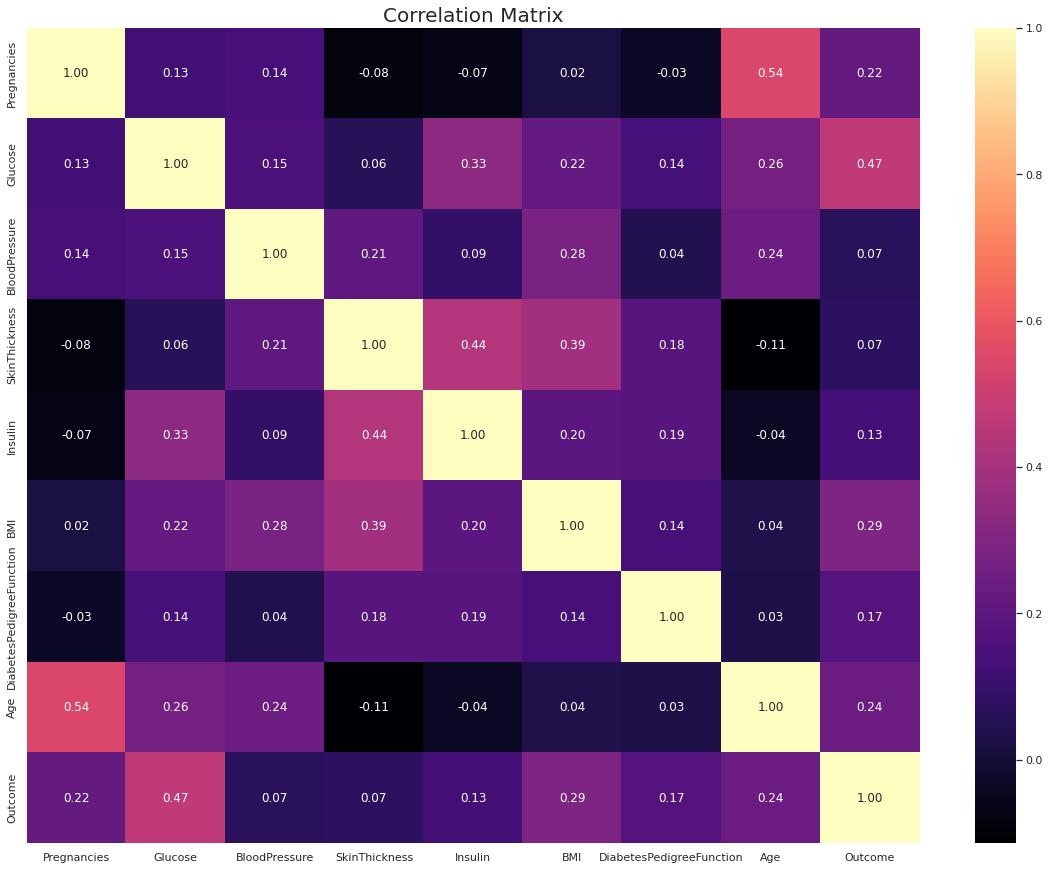

In [12]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(copy_ds.corr(), annot=True, fmt=".2f", cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [13]:
copy_ds[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = copy_ds[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [14]:
temp = copy_ds[['Glucose', 'Outcome']].groupby(['Outcome'])[["Glucose"]].median().reset_index()
print(temp)

temp = copy_ds[['Insulin', 'Outcome']].groupby(['Outcome'])[["Insulin"]].median().reset_index()
print(temp)

temp = copy_ds[['BloodPressure', 'Outcome']].groupby(['Outcome'])[["BloodPressure"]].median().reset_index()
print(temp)

temp = copy_ds[['BMI', 'Outcome']].groupby(['Outcome'])[["BMI"]].median().reset_index()
print(temp)

   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome   BMI
0        0  30.1
1        1  34.3


#Replacing null values with median who having diabetes and not

In [15]:
def median_target(col):   
    temp = copy_ds[copy_ds[col].notnull()]
    temp = temp[[col, 'Outcome']].groupby(['Outcome'])[[col]].median().reset_index()
    return temp
columns = copy_ds.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    copy_ds.loc[(copy_ds['Outcome'] == 0 ) & (copy_ds[i].isnull()), i] = median_target(i)[i][0]
    copy_ds.loc[(copy_ds['Outcome'] == 1 ) & (copy_ds[i].isnull()), i] = median_target(i)[i][1]

In [16]:
copy_ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                    AxesSubplot(0.125,0.125;0.0731132x0.755)
Glucose                     AxesSubplot(0.212736,0.125;0.0731132x0.755)
BloodPressure               AxesSubplot(0.300472,0.125;0.0731132x0.755)
SkinThickness               AxesSubplot(0.388208,0.125;0.0731132x0.755)
Insulin                     AxesSubplot(0.475943,0.125;0.0731132x0.755)
BMI                         AxesSubplot(0.563679,0.125;0.0731132x0.755)
DiabetesPedigreeFunction    AxesSubplot(0.651415,0.125;0.0731132x0.755)
Age                         AxesSubplot(0.739151,0.125;0.0731132x0.755)
Outcome                     AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

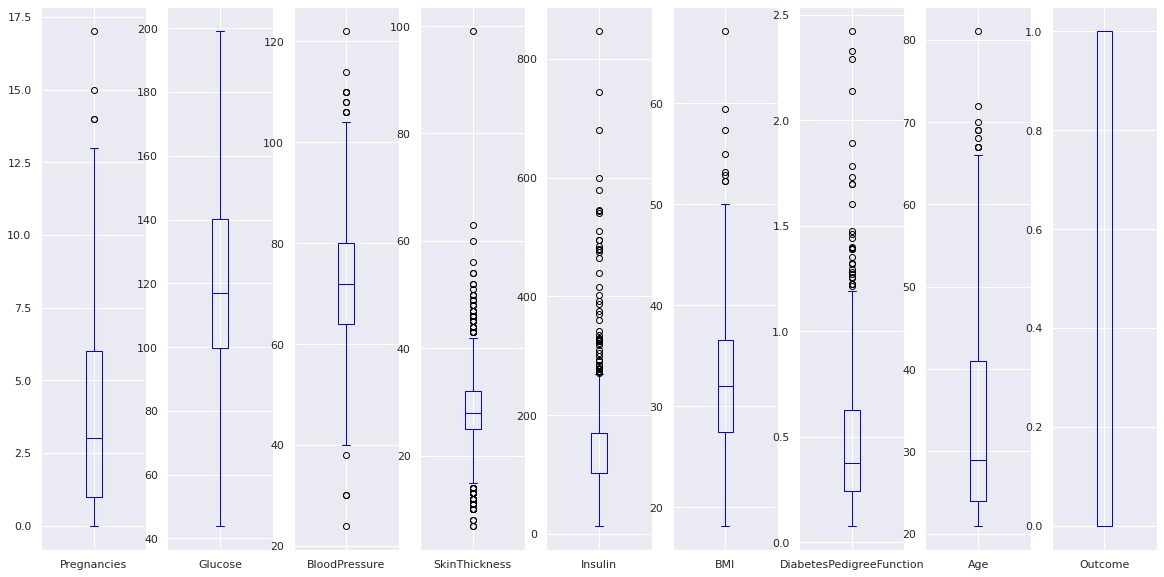

In [17]:
copy_ds.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(20,10),color='blue')

#Removing Outliers using Z score

In [18]:
from scipy import stats
import numpy as np
#z-score provides provides how far a datapoint from mean or relationship to the mean of group of values.
z = np.abs(stats.zscore(copy_ds))
print(z)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.864625       0.032180       0.665181  0.311604  0.169483   
1       0.844885  1.204727       0.528124       0.010112  0.440843  0.848549   
2       1.233880  2.014265       0.693438       0.327535  0.311604  1.328478   
3       0.844885  1.073339       0.528124       0.685405  0.536303  0.630399   
4       1.141852  0.503310       2.677212       0.665181  0.294758  1.551096   
..           ...       ...            ...            ...       ...       ...   
763     1.827813  0.679177       0.298449       2.128317  0.429525  0.067679   
764     0.547919  0.010607       0.197495       0.235210  0.440843  0.634868   
765     0.342981  0.022240       0.032180       0.685405  0.334153  0.906722   
766     0.844885  0.141994       1.024067       0.327535  0.311604  0.339533   
767     0.844885  0.941952       0.197495       0.214986  0.440843  0.295903   

     DiabetesPedigreeFunction       Age

In [19]:
threshold = 3
print(np.where(z > 3))

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 286,
       298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445, 453,
       455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666, 673,
       684, 691, 695, 753]), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2, 3,
       4, 6, 2, 6, 4, 4, 7, 5, 7, 2, 4, 4]))


In [20]:
copy_ds= copy_ds[(z < 3).all(axis=1)] #along column
print(copy_ds)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    169.5  33.6   
1              1     85.0           66.0           29.0    102.5  26.6   
2              8    183.0           64.0           32.0    169.5  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
5              5    116.0           74.0           27.0    102.5  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    102.5  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           32.0    169.5  30.1   
767            1     93.0           70.0           31.0    102.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [21]:
copy_ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,719.000000,719.000000,719.000000,719.00000,719.000000,719.000000,719.00000,719.000000,719.000000
mean,3.841446,120.037552,72.276773,28.71210,131.779555,32.121419,0.44922,32.922114,0.336579
std,3.279022,29.672586,11.337683,8.26455,60.829312,6.479031,0.28279,11.309623,0.472868
min,0.000000,44.000000,38.000000,7.00000,15.000000,18.200000,0.07800,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.00000,102.500000,27.400000,0.24200,24.000000,0.000000
50%,3.000000,115.000000,72.000000,28.00000,102.500000,32.000000,0.36200,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.00000,169.500000,36.100000,0.60000,40.000000,1.000000
max,13.000000,199.000000,108.000000,54.00000,402.000000,52.900000,1.46100,68.000000,1.000000


Pregnancies                    AxesSubplot(0.125,0.125;0.0731132x0.755)
Glucose                     AxesSubplot(0.212736,0.125;0.0731132x0.755)
BloodPressure               AxesSubplot(0.300472,0.125;0.0731132x0.755)
SkinThickness               AxesSubplot(0.388208,0.125;0.0731132x0.755)
Insulin                     AxesSubplot(0.475943,0.125;0.0731132x0.755)
BMI                         AxesSubplot(0.563679,0.125;0.0731132x0.755)
DiabetesPedigreeFunction    AxesSubplot(0.651415,0.125;0.0731132x0.755)
Age                         AxesSubplot(0.739151,0.125;0.0731132x0.755)
Outcome                     AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

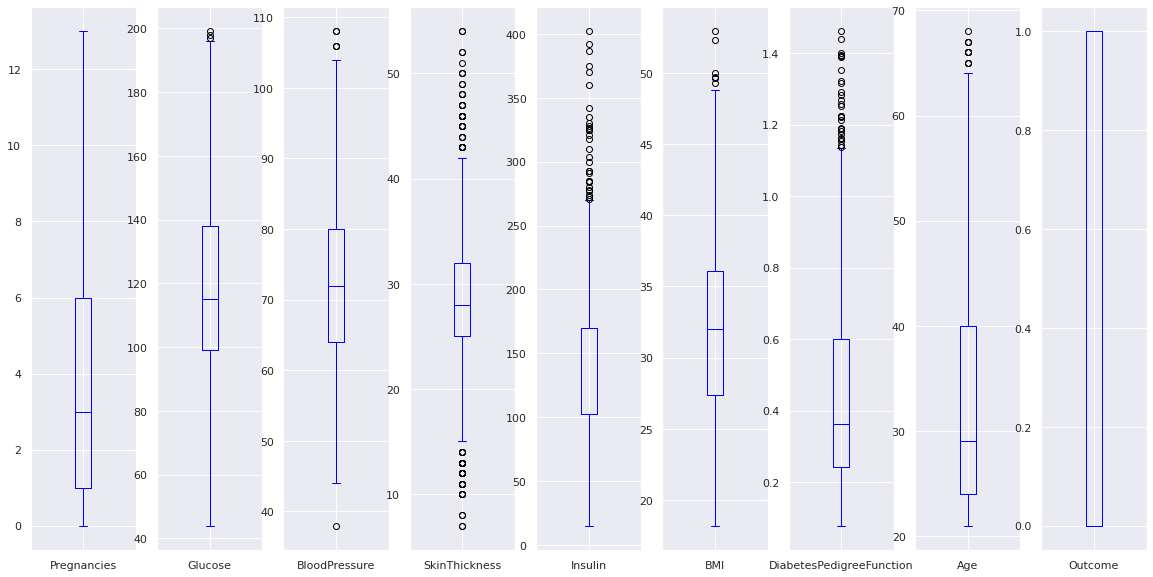

In [22]:
copy_ds.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(20,10),color='blue')

In [23]:
#a quantile determines how many values in a distribution are above or below a certain limit.
Q1 = copy_ds.quantile(0.25)
Q2 = copy_ds.quantile(0.75)
IQR = Q2 - Q1
copy_ds = copy_ds[~((copy_ds < (Q1 - 1.5 * IQR)) | (copy_ds > (Q2 + 1.5 * IQR))).any(axis=1)]
print(copy_ds)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    169.5  33.6   
1              1     85.0           66.0           29.0    102.5  26.6   
2              8    183.0           64.0           32.0    169.5  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
5              5    116.0           74.0           27.0    102.5  25.6   
..           ...      ...            ...            ...      ...   ...   
762            9     89.0           62.0           27.0    102.5  22.5   
764            2    122.0           70.0           27.0    102.5  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           32.0    169.5  30.1   
767            1     93.0           70.0           31.0    102.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Pregnancies                    AxesSubplot(0.125,0.125;0.0731132x0.755)
Glucose                     AxesSubplot(0.212736,0.125;0.0731132x0.755)
BloodPressure               AxesSubplot(0.300472,0.125;0.0731132x0.755)
SkinThickness               AxesSubplot(0.388208,0.125;0.0731132x0.755)
Insulin                     AxesSubplot(0.475943,0.125;0.0731132x0.755)
BMI                         AxesSubplot(0.563679,0.125;0.0731132x0.755)
DiabetesPedigreeFunction    AxesSubplot(0.651415,0.125;0.0731132x0.755)
Age                         AxesSubplot(0.739151,0.125;0.0731132x0.755)
Outcome                     AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

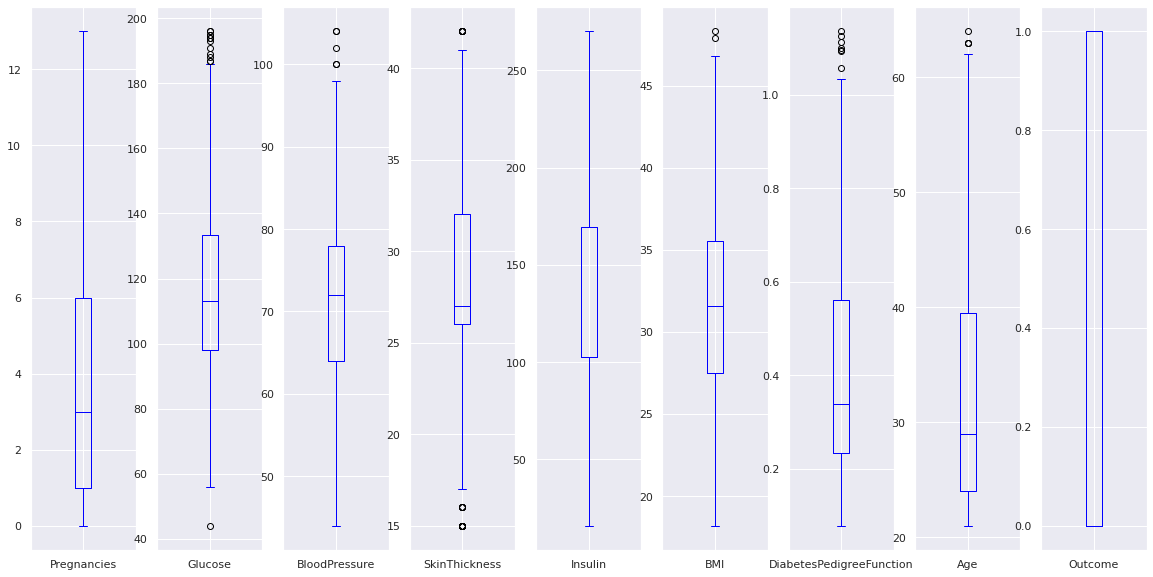

In [24]:
copy_ds.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(20,10),color='blue')


In [25]:
copy_ds.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1
10,4,110.0,92.0,27.0,102.5,37.6,0.191,30,0
11,10,168.0,74.0,32.0,169.5,38.0,0.537,34,1


#Feature Selection in forward direction

In [26]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Support vector machine

In [27]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Read data
df = pd.read_csv('diabetes.csv')
X = copy_ds.drop(columns = ['Outcome'], axis=1)
Y = copy_ds['Outcome']

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [28]:
from sklearn import svm
clf = svm.SVC()
# Build step forward feature selection
sfs1 = sfs(clf,k_features=6,forward=True,floating=False,verbose=2)

# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2023-01-31 12:38:45] Features: 1/6 -- score: 0.8770114942528735[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2023-01-31 12:38:45] Features: 2/6 -- score: 0.8932638331996792[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2023-01-31 12:38:45] Features: 3/6 -- score: 0.8817161186848436[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [29]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 7]


#accuracy on selected features (svm)

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=1, shuffle = True)
clf = svm.SVC(random_state=42)
results = cross_val_score(clf, X_train, Y_train, cv=kfold, scoring='accuracy')
print(results)
clf.fit(X_train.iloc[:, feat_cols], Y_train)

Y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(Y_train, Y_train_pred))

Y_test_pred = clf.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(Y_test, Y_test_pred))

[0.88636364 0.86046512 0.8372093  0.93023256 0.88372093 0.93023256
 0.8372093  0.8372093  0.88372093 0.8372093 ]
Training accuracy on selected features: 0.875
Testing accuracy on selected features: 0.896


#accuracy on over all Fetaures(SVM)

In [31]:
modelsvm=svm.SVC()
#training the support Vector classifier
modelsvm.fit(X_train,Y_train)

Y_train_pred = modelsvm.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(Y_train, Y_train_pred))

Y_test_pred = modelsvm.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(Y_test, Y_test_pred))

Training accuracy on all features: 0.877
Testing accuracy on all features: 0.875


#Random Forest Classifier

In [32]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
X = copy_ds.drop(columns = ['Outcome'], axis=1)
Y = copy_ds['Outcome']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

print('Training dataset shape:', X_train.shape)
print('Testing dataset shape:', X_test.shape)

Training dataset shape: (460, 8)
Testing dataset shape: (115, 8)


In [33]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
# Build step forward feature selection
sfs1 = sfs(clf,k_features=5,forward=True,floating=False,verbose=2)

# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.5s finished

[2023-01-31 12:38:55] Features: 1/5 -- score: 0.8695652173913043[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.6s finished

[2023-01-31 12:39:07] Features: 2/5 -- score: 0.8956521739130435[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.2s finished

[2023-01-31 12:39:18] Features: 3/5 -- score: 0.8956521739130435[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [34]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 4, 6, 7]


#accuracy on selected Features(RF)

In [35]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train.iloc[:,feat_cols],Y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(Y_train, y_train_pred))

y_test_pred = clf.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(Y_test, y_test_pred))

Training accuracy on selected features: 0.935
Testing accuracy on selected features: 0.930


#accuracy on overall features(RF)

In [36]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train, Y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(Y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(Y_test, y_test_pred))

Training accuracy on all features: 0.939
Testing accuracy on all features: 0.913


Sensitivity= 0.8918918918918919
specificity= 0.9487179487179487
Accuracy of RF= 0.9304347826086956
precision= 0.8918918918918919


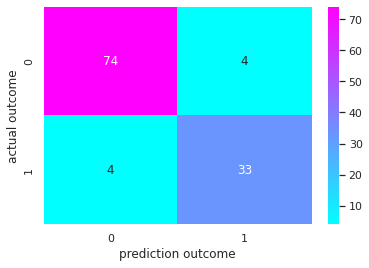

In [37]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)

cf=confusion_matrix(Y_test,y_pred)

tn,fp,fn,tp=cf.ravel()
print("Sensitivity=",(tp)/(tp+fn))
print("specificity=",(tn)/(tn+fp))
print("Accuracy of RF=",(tn+tp)/(tn+tp+fp+fn))
print("precision=",(tp)/(tp+fp))

a=sns.heatmap(cf,annot=True,cmap='cool',fmt="g")
a.set_xlabel("prediction outcome")
a.set_ylabel("actual outcome")
plt.show()

Sensitivity= 0.8918918918918919
specificity= 0.8717948717948718
Accuracy of SVM= 0.8782608695652174
precision= 0.7674418604651163


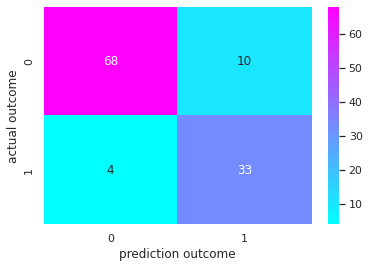

In [38]:
modelsvm=svm.SVC()
#training the support Vector classifier
modelsvm.fit(X_train,Y_train)
Y_pred=modelsvm.predict(X_test)
Y_train_pred=modelsvm.predict(X_train)

cf=confusion_matrix(Y_test,Y_pred)

tn,fp,fn,tp=cf.ravel()
print("Sensitivity=",(tp)/(tp+fn))
print("specificity=",(tn)/(tn+fp))
print("Accuracy of SVM=",(tn+tp)/(tn+tp+fp+fn))
print("precision=",(tp)/(tp+fp))
a=sns.heatmap(cf,annot=True,cmap='cool',fmt="g")
a.set_xlabel("prediction outcome")
a.set_ylabel("actual outcome")
plt.show()

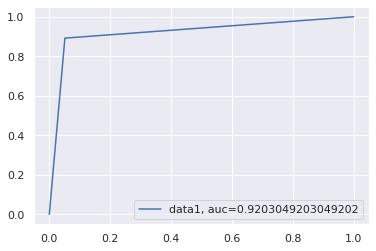

In [39]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr,tpr,_=metrics.roc_curve(Y_test,y_pred)
auc=metrics.roc_auc_score(Y_test,y_pred)
plt.plot(fpr,tpr,label="data1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [40]:
from sklearn.naive_bayes import GaussianNB as NB
X = copy_ds.drop(columns = 'Outcome', axis=1)
Y = copy_ds['Outcome']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
#standardization--scaling technique wherein it makes the data scale-free by converting the statistical distribution 
#of the data as 0 mean and variance equal to 1.
nb=NB()
nb.fit(X_train,Y_train)
y_pred=nb.predict(X_test)
print("accuarcy score of naive bayes:",accuracy_score(Y_test,Y_pred))

lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
print("accuracy score ofLogistic Regression:",accuracy_score(Y_test,y_pred))


modelsvm=svm.SVC()
#training the support Vector classifier
modelsvm.fit(X_train,Y_train)


Y_pred=modelsvm.predict(X_test)
Y_train_pred=modelsvm.predict(X_train)

#accuracy score on test dataset
test_data_accuracy=accuracy_score(Y_pred,Y_test)
print("accuracy score of SVM:",test_data_accuracy)

rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
print("accuracy score of RAndomForest:",accuracy_score(Y_test,y_pred))


accuarcy score of naive bayes: 0.8782608695652174
accuracy score ofLogistic Regression: 0.8434782608695652
accuracy score of SVM: 0.8782608695652174
accuracy score of RAndomForest: 0.9391304347826087
